# Conditions KKT

## Conditions de second ordre

## Exemple 1

Un exemple simple, adapté de http://www.math.ubc.ca/~israel/m340/

Considérons le problème
\begin{align*}
\max\ & f(x, y) = xy \\
\mbox{s.t. } & x + y^2 \leq 2 \\
& x, y \geq 0
\end{align*}

Notons que la région réalisable est bornée, et que $f(x,y)$ est continue, aussi un maxium global existe. Réécrivons le problème comme
\begin{align*}
\min\ & -xy \\
\mbox{s.t. } & x + y^2 -2 \leq 0 \\
& -x \leq 0\\
& -y \leq 0
\end{align*}
La fonction lagrangienne
$$
L(x,\lambda) = -xy + \lambda_1(x+y^2-2) + \lambda_2(-x) + \lambda_3(-y).
$$

Les conditions KKT peuvent être écrites comme
\begin{align*}
-y + \lambda_1 - \lambda_2 &= 0 \\
-x + 2\lambda_1y - \lambda_3 &= 0 \\
x + y^2 -2 &\leq 0 \\
-x &\leq 0\\
-y &\leq 0 \\
\lambda_1(x + y^2 -2) &= 0 \\
\lambda_2(-x) &= 0\\
\lambda_3(-y) &= 0 \\
\lambda_i &\geq 0,\ i = 1,2,3
\end{align*}

ou
\begin{align*}
-y + \lambda_1 - \lambda_2 &= 0 \\
-x + 2\lambda_1y - \lambda_3 &= 0 \\
x + y^2 -2 &\leq 0 \\
\lambda_1(x + y^2 -2) &= 0 \\
\lambda_2x &= 0\\
\lambda_3y &= 0 \\
\lambda_i &\geq 0,\ i = 1,2,3 \\
x, y &\geq 0\\
\end{align*}

Supposons $\lambda_1 = 0$. Alors
\begin{align*}
\lambda_2 &= -y \\
\lambda_3 &= -x
\end{align*}
Comme $x, y, \lambda_2, \lambda_3 \geq 0$, ceci implique $x = y = \lambda_1 = \lambda_2 = \lambda_3 = 0$.

Mais $f(0,0) = 0$, et clairement, il ne s'agit pas d'un minimum comme par exemple, $f(1,1) = -1$, et $(1,1)$ est réalisable.

Prenons $\lambda_1 \ne 0$. Nous devons alors avoir $x + y^2 - 2 = 0$, et dès lors, $x$ ou $y$ est strictement positif.

Supposons $x > 0$. Alors $\lambda_2 = 0$ et $\lambda_1 = y$. Puisque $\lambda_1 \ne 0$, $\lambda_3 = 0$, et $x = 2\lambda_1y = 2y^2$. Dès lors
$$
0 = x + y^2 - 2 = x + \frac{x}{2} - 2 = \frac{3x}{2} - 2
$$
et
$$
x = \frac{4}{3},\ y = \sqrt{\frac{2}{3}}
$$

Supposons $x = 0$, $y > 0$. Dès lors, $y = \sqrt{2}$ et $\lambda_3 = 0$. Mais ceci implique également $\lambda_1 = 0$, alors que nous avions supposé $\lambda_1 \ne 0$. Par conséquent, ce cas ne peut pas arriver.

Dès lors, nous avons deux points KKT: $\left( \frac{4}{3}, \sqrt{\frac{2}{3}} \right)$ et $(0, 0)$. $\left( \frac{4}{3}, \sqrt{\frac{2}{3}} \right)$ est le minimiseur de la fonction.

Pouvons-nous le vérifier en utilisant les conditions d'optimalité au second ordre? Tout d'abord, exprimons $\nabla^2_{xx} L(x, \lambda)$.
Nous avons
$$
\nabla^2_{xx} L(x, \lambda) =
\begin{pmatrix}
0 & -1 \\
-1 & 2\lambda_1
\end{pmatrix}
$$
Puisque le premier mineur principal vaut 0, la matrice ne peut pas être définie positive.

Pour $(0, 0)$, nous avons deux contraintes actives:
\begin{align*}
-x &= 0 \\
-y &= 0
\end{align*}
La matrice jacobienne associée à ces contraintes est
$$
J = \begin{pmatrix}
-1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$
et la LICQ est trivialement vérifée. Nous pouvons le vérifier également en calculant le rang de $J$:

In [1]:
using LinearAlgebra

J = [-1 0; 0 -1]
rank(J)

2

Remarques sur la fonction `rank`:

In [2]:
J = [-1 1+1e-12; 1 -1]
rank(J,1e-8), rank(J)

(1, 2)

In [3]:
J = [-1 1+1e-16; 1 -1]
inv(J)*J

LoadError: SingularException(2)

In [4]:
rank(J)

1

In [5]:
J = [-1 1+1e-12; 1-1e-8 -1]
rank(J,1e-8), rank(J)

(1, 2)

In [6]:
eigen(J)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.9999999950005
 -4.9995000361846564e-9
vectors:
2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

In [7]:
methods(rank)

# 6 methods for generic function "rank":
[1] rank(x::Number) in LinearAlgebra at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\LinearAlgebra\src\generic.jl:1013
[2] rank(C::CholeskyPivoted) in LinearAlgebra at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\LinearAlgebra\src\cholesky.jl:697
[3] rank(F::SuiteSparse.SPQR.QRSparse) in SuiteSparse.SPQR at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\SuiteSparse\src\spqr.jl:324
[4] rank(S::SparseArrays.SparseMatrixCSC) in SuiteSparse.SPQR at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\SuiteSparse\src\spqr.jl:325
[5] rank(A::AbstractMatrix; atol, rtol) in LinearAlgebra at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\LinearAlgebra\src\generic.jl:1007
[6] rank(A::AbstractMatrix, tol::Real) in LinearAlgebra at C:\Users\slash\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\LinearAlgebra\src\deprecated.jl:4

Les conditions au second ordre implique le calcul de $d^T \nabla^2_{xx} L(x^*, \lambda^*)d$ pour tout $d \in N^+$, où
$$
N^+ =
\left\lbrace d \ne 0 \,\bigg|\,
\begin{matrix}
d^T \nabla g_i(x^*) = 0, & i \in \mathcal{E} \\
d^T \nabla g_i(x^*) \leq 0, & i \in \mathcal{A}(x^*) \cap \mathcal{I}
\end{matrix}
\right\rbrace
$$
Malheureusement, comme nous avons aussi $\lambda^* = 0$ pendant que $(\mathcal{A}(x^*) \cap \mathcal{I}) \ne \emptyset$, la condition de complémentarité stricte ne tient pas. Il n'est dès lors pas aisé de caractériser $N^+$.

Il est néanmoins facile de trouver un $d \in N^+$ tel que les conditions de second ordre soient violées.

Notons que la matrice jacobienne est
$$
J(x) = \begin{pmatrix}
\nabla^T g_i(x^*), \text{ for } i \in \mathcal{A}(x^*) 
\end{pmatrix}
$$

Prenons $d = (1,1)$. Nous pouvons vérifier que $d \in N^+$ en calculant $Jd = (d^TJ^T)^T$, ce qui donne

In [8]:
d = [1.0; 1.0]
J = [-1.0 0; 0 -1.0]
J*d

2-element Vector{Float64}:
 -1.0
 -1.0

Si nous calculons $d^T\nabla^2_{xx} L(x,\lambda) d$, nous obtenons

In [9]:
D2L = [0 -1.0; -1.0 0]
d'*D2L*d

-2.0

Dès lors, le condition nécessaire d'optimalité au second ordre est violée. En d'autres termes, (0,0) n'est pas une solution critique au deuxième ordre.

Le vecteur des multiplicateurs de Lagrange associés à $\left( \frac{4}{3}, \sqrt{\frac{2}{3}} \right)$ est
$$
\lambda^* = \begin{pmatrix} \sqrt{\frac{2}{3}} \\ 0 \\ 0 \end{pmatrix}
$$
et la contrainte active est
\begin{align*}
x + y^2 - 2 &= 0
\end{align*}

La matrice jacobienne de l'ensemble actif en $\left( \frac{4}{3}, \sqrt{\frac{2}{3}} \right)$ est
$$
J = \begin{pmatrix}
1 & 2\sqrt{\frac{2}{3}} \\
\end{pmatrix}
$$
et à nouveau, il est trivial de vérifier la LICQ.

Mais maintenant,
$$
\nabla^2_{xx} L(x^*, \lambda^*) =
\begin{pmatrix}
0 & -1 \\
-1 & 2\sqrt{\frac{2}{3}}
\end{pmatrix}
$$
et la condition de stricte complémentarité tient.

Dès lors,
$$
N^+ = \left\{ d \ne 0 \,|\, Jd = 0 \right\}.
$$

Par conséquent, nous devons considérer les vecteurs $d \in \mathbb{R}^n$ tels que
$$
d^T \begin{pmatrix} 1 \\ 2\sqrt{\frac{2}{3}} \end{pmatrix} = 0
$$
En d'autres mots, $d \in Null(J)$, $d \ne 0$, où
$$
J = \begin{pmatrix} 1 & 2\sqrt{\frac{2}{3}} \end{pmatrix}
$$

$Null(J) = \{ d \,|\, Jd = 0\}$. Dès lors $N^+ = Null(J)\backslash(0,0)$. $Null(J)$ est un espace vectoriel, comme $\forall \alpha, \beta \in \mathbb{R}$ et $a, b \in Null(J)$, $\alpha a + \beta b \in Null(J)$ comme
$$
J(\alpha a + \beta b) = \alpha Ja + \beta Jb = 0.
$$
Autrement dit, toute combinaison linéaire d'éléments de $Null(J)$ appartient à $Null(J)$.

Dès lors, on peut caractériser $Null(J)$ par une base de cet espace, ce qui est produit par la fonction `nullspace`, qui retourne une base orthonormée.

In [10]:
A = [1 2*sqrt(2/3) ]
w = nullspace(A)

2×1 Matrix{Float64}:
 -0.8528028654224418
  0.5222329678670935

$w$ est un vecteur de base de $A$, de norme égale à 1:

In [11]:
norm(w)

1.0

Calculons $w^T\Delta^2_{xx} L(x,\lambda) w$:

In [12]:
D2L[2,2] = 2*sqrt(2/3)
w'*D2L*w

1×1 Matrix{Float64}:
 1.33608531424537

Il est suffisant de vérifier les conditions de second ordre sur les vecteurs de la base de $Null(J)$. En effet, soit $d = \sum_i α_iw_i$, $d \ne 0$. Alors
$$
d^T \nabla^2_{xx} L(x,\lambda) d = \sum_i α_i^2w_i^T \nabla^2_{xx} L(x,\lambda) w_i > 0.
$$

Les conditions nécessaires et suffisantes d'optimalité au deuxième ordre sont alors satisfaites.

## Exemple 2

Utilisez les conditions de Karush-Kuhn-Tucker pour résoudre
\begin{align*}
\max\ & KL \\
\mbox{sujet à } & 4K + L \leq 8 \\
& K, L \geq 0
\end{align*}

Les conditions KKT sont
\begin{align*}
L − 4\lambda_1 + \lambda_2 &= 0 \\
K − \lambda_1 + \lambda_3 &= 0 \\
\lambda_1(8 − 4K − L) &= 0 \\
\lambda_2K &= 0 \\
\lambda_3L &= 0 \\
4K + L &\leq 8 \\
K,L, \lambda_1, \lambda_2, \lambda_3 &\geq 0
\end{align*}

### Cas 1.

Si $\lambda_1 = 0$, la première condition KKT donne $L + \lambda_2 = 0$, ce qui implique $L = \lambda_2 = 0$, et la seconde indique $K + \lambda_3 = 0$, entrînant $K = \lambda_3 = 0$. Les conditions KKT sont en effet satisfaites avec $K = L = \lambda_1 = \lambda_2 = \lambda_3 = 0$, et la valeur de la fonction objectif en K = L = 0 est 0, ce qui correspond à la borne inférieur de la fonction objectif sur l'ensemble réalisable et ce n'est clairement pas la valeur optimale en termes de maximisation.

### Cas 2

Si $\lambda_1 > 0$, $4K + L = 8$. Dès lors, $K$ ou $L$ est positif, impliquant que $\lambda_2$ ou $\lambda_3$ vaut 0. Si $\lambda_2 = 0$, $L = 4\lambda_1 > 0$, mais ceci entraîne $\lambda_3 = 0$. Similairement, si $\lambda_3 = 0$, $K = \lambda_1 > 0,$ mais cela implique $\lambda_2 = 0$. Dès lors, nous devons avoir $\lambda_2 = \lambda_3 = 0,$ $L = 4\lambda_1$ et $K = \lambda_1$. Alors $4K + L = 8$, $K = \lambda_1$, $L = \lambda_1$, impliquant $4\lambda_1 + 4\lambda_1 = 8$, aussi $\lambda_1 = 1,$ $K = 1$ and $L = 4$. Les conditions KKT sont satisfaites avec $K = 1$, $L = 4$, $\lambda_1 = 1$, $\lambda_2 = \lambda_3 = 0$, et la fonction objectif vaut 4.

Nous pouvons également à nouveau vérifier que les conditions d'optimalité au second ordre sont vérifées.

Sous forme standard, le problème s'écrit
\begin{align*}
\min\ & -KL \\
\mbox{sujet à } & 4K + L - 8 \leq 0\\
& -K \leq 0 \\
& -L \leq 0
\end{align*}
La matrice hessienne de la fonction lagrangienne est 
$$
\nabla^2 L(K,L,\lambda) =
\begin{pmatrix}
    0 & -1 \\ -1 & 0
\end{pmatrix}
$$
La matrice jacobienne des contraintes actives (plus précisement de la contrainte active) vaut, à la solution,
$$
J = \begin{pmatrix}
4 & 1
\end{pmatrix}
$$

Calculons une base de son noyau et testons la condition au second ordre sur le vecteur de base.

In [18]:
J = [ 4 1 ]
w = nullspace(J)
L2 = [ 0 -1 ; -1 0]
w'*L2*w

1×1 Array{Float64,2}:
 0.47058823529411764

Nous satisfaisons les conditions suffisantes d'optimalité au second ordre. Le point $K = 1$, $L = 4$ est donc un minimum local, et dans le cas présent, un minimum global.

In [21]:
using Plots

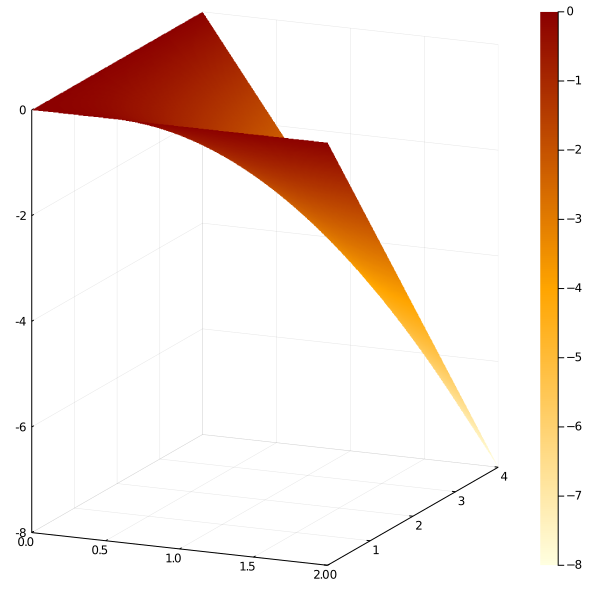

In [22]:
using Plots

default(size=(600,600), fc=:heat)
x, y = 0:0.02:2.0, 0:0.02:4.0
z = Surface((x,y)->(-x*y), x, y)
surface(x,y,z, linealpha = 0.3)

In [25]:
using JuMP, Ipopt

┌ Info: Precompiling Ipopt [b6b21f68-93f8-5de0-b562-5493be1d77c9]
└ @ Base loading.jl:1278


In [24]:
import Pkg; Pkg.add("Ipopt")

   Updating registry at `C:\Users\bastin\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [=====>                                   ]  

Fetching: [========================================>]  99.8 %=============>                           ]  32.1 %6 %                     ]  45.7 %]  53.5 %             ]  65.6 % %]  80.7 %]  96.1 % %9 %

  Resolving package versions...
  Installed Ipopt_jll ───── v3.13.2+1
  Installed ASL_jll ─────── v0.1.1+4
  Installed MUMPS_seq_jll ─ v5.2.1+4
  Installed METIS_jll ───── v5.1.0+5
  Installed Ipopt ───────── v0.6.5
Updating `C:\Users\bastin\.julia\environments\v1.5\Project.toml`
  [b6b21f68] + Ipopt v0.6.5
Updating `C:\Users\bastin\.julia\environments\v1.5\Manifest.toml`
  [ae81ac8f] + ASL_jll v0.1.1+4
  [b6b21f68] + Ipopt v0.6.5
  [9cc047cb] + Ipopt_jll v3.13.2+1
  [d00139f3] + METIS_jll v5.1.0+5
  [d7ed1dd3] + MUMPS_seq_jll v5.2.1+4
   Building Ipopt → `C:\Users\bastin\.julia\packages\Ipopt\P1XLY\deps\build.log`


In [29]:
m = Model(with_optimizer(Ipopt.Optimizer))
# setsolver(m, IpoptSolver(tol = 1e-6, max_iter = 200, output_file = "results.txt"))

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

@constraint(m, 4*x1+x2 <= 8)
@NLobjective(m, Min, -x1*x2)

println(m)

Min -x1 * x2
Subject to
 4 x1 + x2 <= 8.0
 x1 >= 0.0
 x2 >= 0.0



In [30]:
set_start_value(x1, 1)
set_start_value(x2, 1)

optimize!(m)

println("got ", objective_value(m), " at [", value(x1), ", ", value(x2), "]")

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -